In [18]:

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/
df_test  = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [19]:
df_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [34]:
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [32]:
df = pd.concat([df_train, df_test])
df = df.iloc[:10000,:]
df


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,3,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,9996,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,5,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,9997,14057,Female,Loyal Customer,39,Business travel,Business,319,4,4,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,9998,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,5,...,4,4,3,4,5,4,5,1,11.0,satisfied


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

In [23]:
df.isnull().any()

,0
Unnamed: 0,False
id,False
Gender,False
Customer Type,False
Age,False
Type of Travel,False
Class,False
Flight Distance,False
Inflight wifi service,False
Departure/Arrival time convenient,False


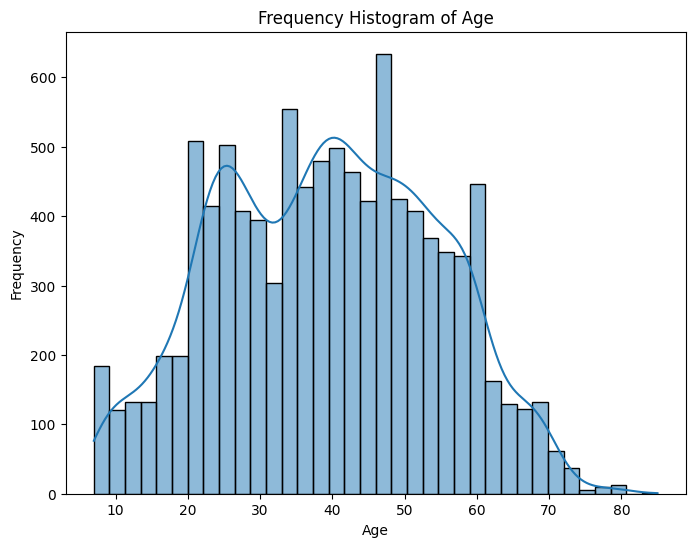

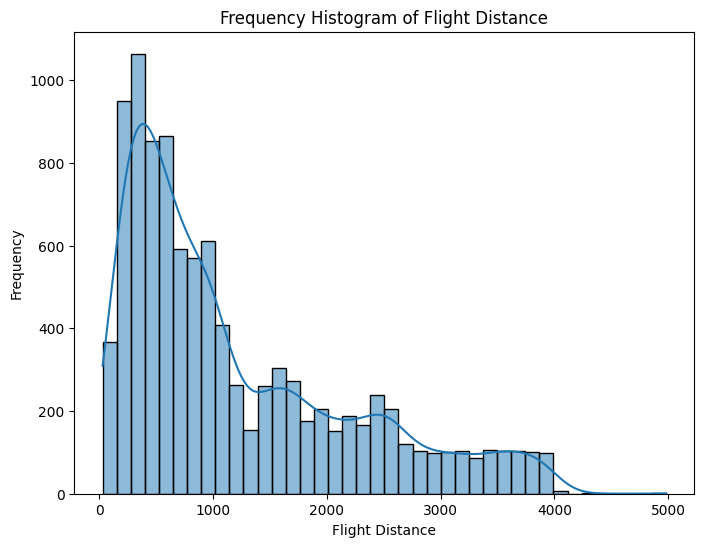

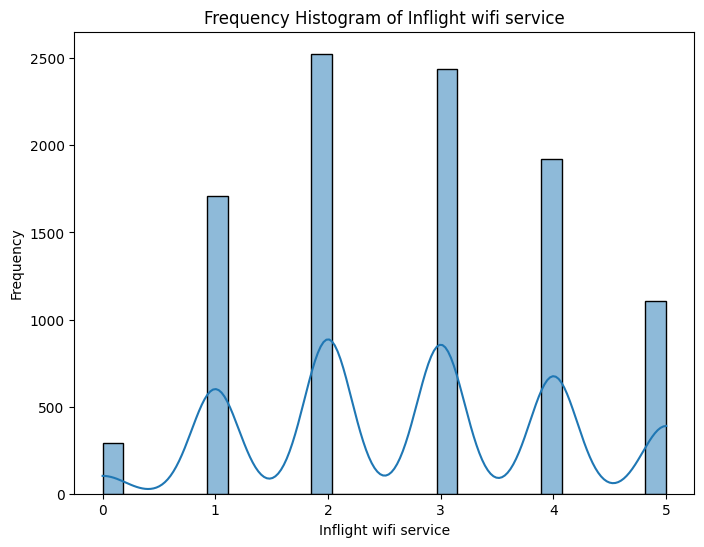

In [35]:


import matplotlib.pyplot as plt
numeric_columns = df.select_dtypes(include = 'number').columns
numeric_columns


columns_to_plot = numeric_columns[2:5]


for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Frequency Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

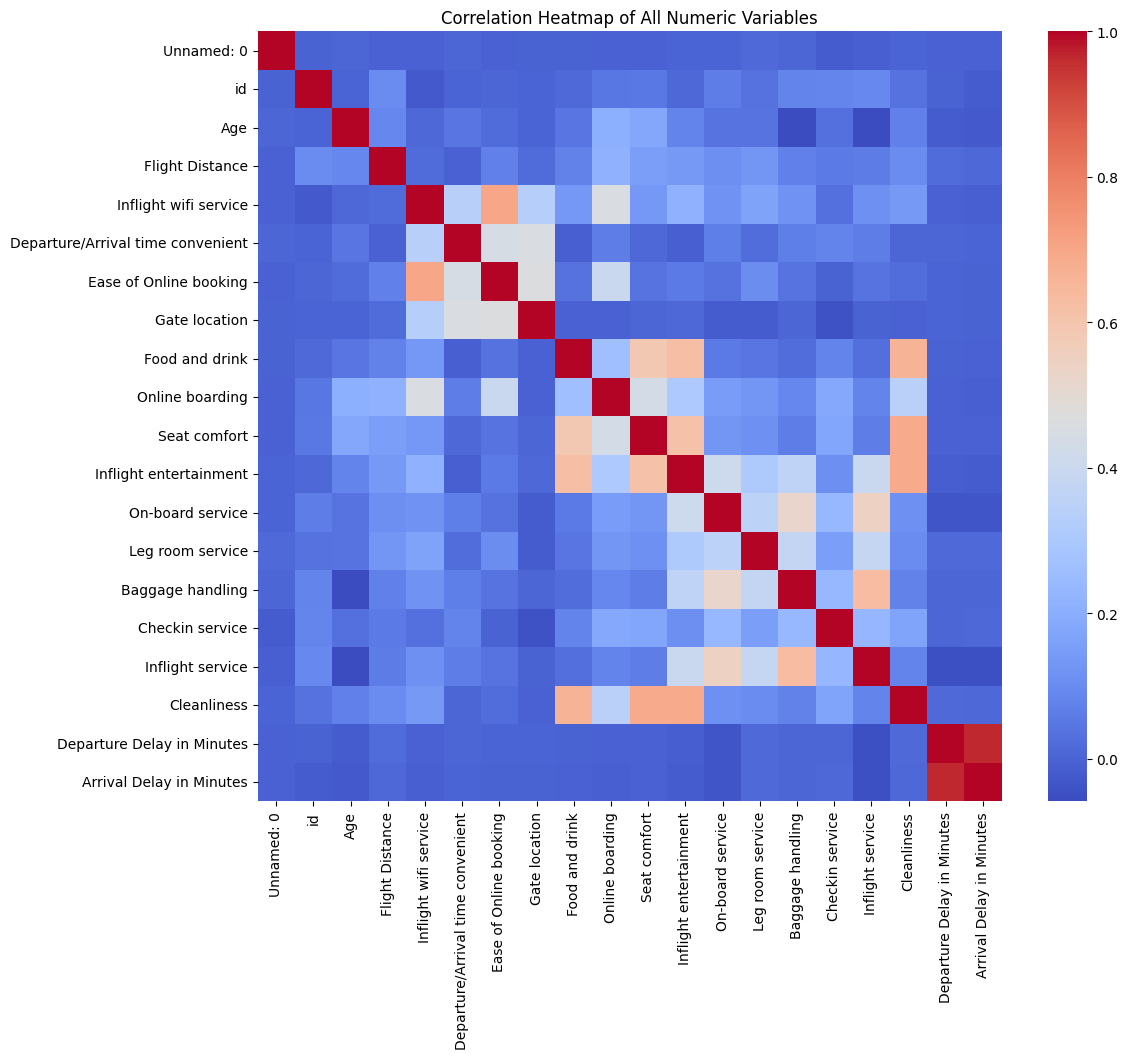

In [36]:


import matplotlib.pyplot as plt

correlation_matrix = df[numeric_columns].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Numeric Variables')
plt.show()

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from scipy.stats import uniform, randint

# Assuming 'satisfaction' is the target variable
if 'satisfaction' in df.columns:
    X = df.drop('satisfaction', axis=1)
    y = df['satisfaction'].map({
    'neutral or dissatisfied': 0,
    'satisfied': 1
    })

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Identify categorical and numerical columns
    categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
    numerical_features = X_train.select_dtypes(include=np.number).columns



    common_transformer = Pipeline(steps=[
        ('imputer', KNNImputer(n_neighbors=5)),  # First impute missing values
        ('scaler', StandardScaler())             # Then standardize
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features),
            ('common', common_transformer, numerical_features)  # Apply to all non-categorical columns
        ],
    remainder='drop'  # Explicitly drop any remaining columns not handled above
)

    # Create a pipeline with preprocessing, PCA, and a classifier placeholder
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA()),
        ('classifier', RandomForestClassifier())  # Placeholder
    ])
    max_pca_components = min(X_train.shape[1], 50)
    print(f"Maximum PCA components: {max_pca_components}")
    # Define the parameter distribution for RandomizedSearchCV
    param_distributions = [
        # RandomForest
        {
            'pca__n_components': randint(2, max_pca_components),
            'classifier': [RandomForestClassifier()],
            'classifier__n_estimators': randint(50, 500),
            'classifier__max_depth': randint(3, 20),
            'classifier__min_samples_split': randint(2, 11)
        },
        # LogisticRegression (OneVsRest)
        {
            'pca__n_components': randint(2, max_pca_components),
            'classifier': [OneVsRestClassifier(LogisticRegression(solver='liblinear'))],
            'classifier__estimator__C': uniform(0.1, 10),
            'classifier__estimator__penalty': ['l1', 'l2']
        },
        # SVC (Fixed version)
        {
            'pca__n_components': randint(2, max_pca_components),
            'classifier': [SVC(probability=True)],
            'classifier__C': uniform(0.1, 10),
            'classifier__gamma': ['scale', 'auto'] + list(np.round(uniform(0.001, 1).rvs(3), 4)),
            'classifier__kernel': ['rbf', 'poly']
        }
    ]
    # Create RandomizedSearchCV object
    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_distributions,
        n_iter=3,  # Increased number of iterations
        cv=3,
        verbose=2,
        random_state=42,
        n_jobs=-1,
        scoring='accuracy'
    )

    # Fit RandomizedSearchCV to the training data
    random_search.fit(X_train, y_train)

    # Print the best parameters and best score
    print("Best parameters found: ", random_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

    # Evaluate the best model on the test data
    best_model = random_search.best_estimator_
    test_score = best_model.score(X_test, y_test)
    print("Test set accuracy: {:.2f}".format(test_score))

else:
    print("The 'satisfaction' column was not found in the DataFrame.")

Maximum PCA components: 24
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters found:  {'classifier': SVC(probability=True), 'classifier__C': np.float64(4.558327528535911), 'classifier__gamma': np.float64(0.263), 'classifier__kernel': 'rbf', 'pca__n_components': 22}
Best cross-validation score: 0.90
Test set accuracy: 0.91


In [24]:
df['satisfaction'].value_counts()

,count
satisfaction,
neutral or dissatisfied,73452
satisfied,56428
